# Sentiment Analysis
## Introduction
This notebook contains sentiment analysis for the Batman movie screenplays. A few key points to remember with sentiment analysis.

1. **TextBlob Module**: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels**: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.

* **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
* **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Let's take a look at the sentiment of the various scene dialogues.

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import math

# sentiment analysis
from textblob import TextBlob

# visualization
import matplotlib.pyplot as plt

In [2]:
# read in the corpus
df = pd.read_pickle('df.pkl')

In [3]:
# create functions to find the polarity and subjectivity of each routine
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['dialogue_lemmatized'].apply(pol)
df['subjectivity'] = df['dialogue_lemmatized'].apply(sub)
df

,director,movie,scene,character,dialogue,dialogue_lemmatized,polarity,subjectivity
Batman Scene 2,Tim Burton,Batman,2,"[Dad, Jimmy, Mom]",for gods sake harold can we please just get a ...,for god sake harold can we please just get a t...,-0.500000,0.900000
Batman Scene 3,Tim Burton,Batman,3,"[Nick, Derelict]",hey mister gimme a dollar mister how about ...,hey mister gimme a dollar mister how about it ...,0.000000,0.000000
Batman Scene 5,Tim Burton,Batman,5,"[Batman, Nick, Eddie]",alright american express there aint no bat y...,alright american express there aint no bat you...,0.300000,0.500000
Batman Scene 6,Tim Burton,Batman,6,"[Harvey, Dent, Borg, Mayor]",across this nation the words gotham city are s...,across this nation the word gotham city are sy...,0.056162,0.328687
Batman Scene 7,Tim Burton,Batman,7,"[Jack, Hunt, Alicia, Dent, Napier, Harvey]",and besides he doesnt know you dont worry ab...,and besides he doesnt know you dont worry abou...,0.416667,0.500000
...,...,...,...,...,...,...,...,...
The Dark Knight Rises Scene 302,Christopher Nolan,The Dark Knight Rises,302,[Lawyers],the house and grounds are left to the city of ...,the house and ground are left to the city of g...,0.000000,0.000000
The Dark Knight Rises Scene 303,Christopher Nolan,The Dark Knight Rises,303,[Lawyers],and that they shall be used for one purpose an...,and that they shall be used for one purpose an...,0.000000,1.000000
The Dark Knight Rises Scene 304,Christopher Nolan,The Dark Knight Rises,304,"[Lawyers, John, Blake]",my clerk will help anyone with the smaller cor...,my clerk will help anyone with the smaller cor...,0.170000,0.360000
The Dark Knight Rises Scene 305,Christopher Nolan,The Dark Knight Rises,305,"[Fox, Lucius, Workers]",why worry about the stabilization software thi...,why worry about the stabilization software thi...,0.150000,0.300000


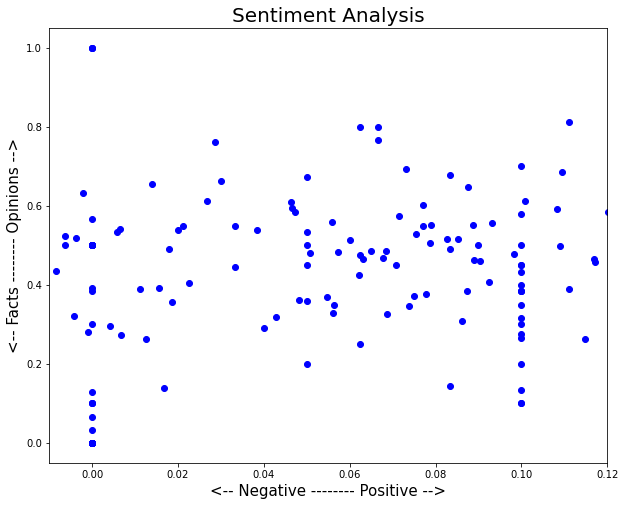

In [4]:
# plot the results

plt.rcParams['figure.figsize'] = [10, 8]

for index, scene in enumerate(df.index):
    x = df.polarity.loc[scene]
    y = df.subjectivity.loc[scene]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, df['dialogue'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()